# Most Commonly Used sklearn Components in Open Source Repos

### Load and Transform Data

In [1]:
import pickle
import pandas as pd

from analysis_utils import extract_repo_info, count_component_occurrences, plot_component_popularity

In [2]:
ipynb_df = pd.read_parquet('./sklearn_components_counts.parquet')

In [3]:
ipynb_df.rename(columns={'module': 'library'}, inplace=True)
ipynb_df = extract_repo_info(ipynb_df)
ipynb_df

,repo,filename,library,component_type,component_name,count
0,4paradigm/AutoX,autox/autox_interpreter/interpreter_demo/lgb_i...,sklearn,function,plot_tree,1
1,4paradigm/AutoX,autox/autox_interpreter/interpreter_demo/lgb_i...,sklearn,function,train_test_split,3
2,4paradigm/AutoX,autox/autox_interpreter/interpreter_demo/lr_in...,sklearn,attribute,classes_,1
3,4paradigm/AutoX,autox/autox_interpreter/interpreter_demo/lr_in...,sklearn,attribute,coef_,3
4,4paradigm/AutoX,autox/autox_interpreter/interpreter_demo/lr_in...,sklearn,class,ColumnTransformer,1
...,...,...,...,...,...,...
42254,zjost/blog_code,tab2graph_fraud/xente_tabular_to_graph.ipynb,sklearn,function,roc_curve,1
42255,zjost/blog_code,tab2graph_fraud/xente_tabular_to_graph.ipynb,sklearn,method,fit,4
42256,zjost/blog_code,tab2graph_fraud/xente_tabular_to_graph.ipynb,sklearn,method,predict,6
42257,zjost/blog_code,tab2graph_fraud/xente_tabular_to_graph.ipynb,sklearn,method,predict_proba,6


In [4]:
with open('/home/tobiasz/Repos/python-libraries-stats/jupyter-notebook-repos.pickle', 'rb') as f:
    jupyter_repos = pickle.load(f)
    del jupyter_repos['saved_dates']
jupyter_repos

{'LibraryOfCongress/newspaper-navigator': {'id': 231426741,
  'name': 'newspaper-navigator',
  'full_name': 'LibraryOfCongress/newspaper-navigator',
  'html_url': 'https://github.com/LibraryOfCongress/newspaper-navigator',
  'created_at': '2020-01-02T17:16:06Z',
  'updated_at': '2024-04-23T03:22:29Z',
  'size': 1604160,
  'stargazers_count': 224,
  'topics': [],
  'watchers': 224,
  'license': {'key': 'unlicense',
   'name': 'The Unlicense',
   'spdx_id': 'Unlicense',
   'url': 'https://api.github.com/licenses/unlicense',
   'node_id': 'MDc6TGljZW5zZTE1'}},
 'raveendarv/AppliedAiCourse-AssignmentAndNotes': {'id': 231320844,
  'name': 'AppliedAiCourse-AssignmentAndNotes',
  'full_name': 'raveendarv/AppliedAiCourse-AssignmentAndNotes',
  'html_url': 'https://github.com/raveendarv/AppliedAiCourse-AssignmentAndNotes',
  'created_at': '2020-01-02T06:25:28Z',
  'updated_at': '2024-04-27T11:24:21Z',
  'size': 341645,
  'stargazers_count': 169,
  'topics': [],
  'watchers': 169,
  'license': {

### By Number of Repos they Appear in

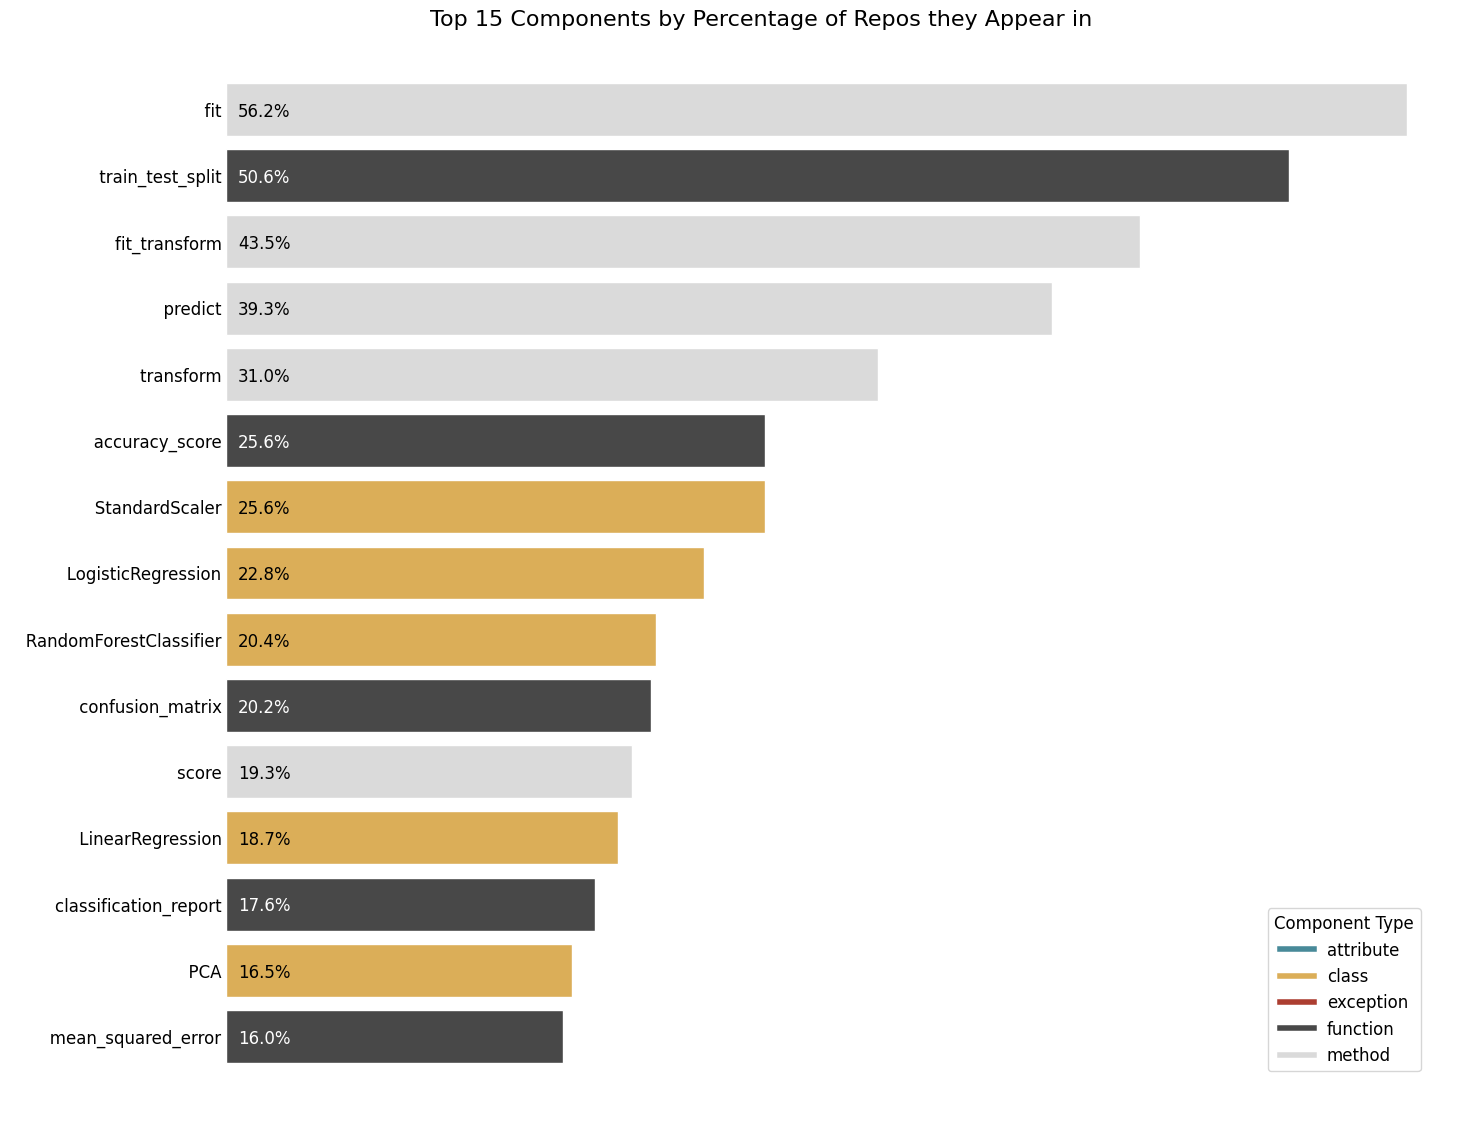

In [8]:
repo_count = ipynb_df['repo'].nunique()
component_counts = count_component_occurrences(ipynb_df, within_column='repo')
plot_component_popularity(component_counts, 'Top 15 Components by Percentage of Repos they Appear in', divide_by_to_show_prc=repo_count, top_n=15)

### By number of Files they Appear in

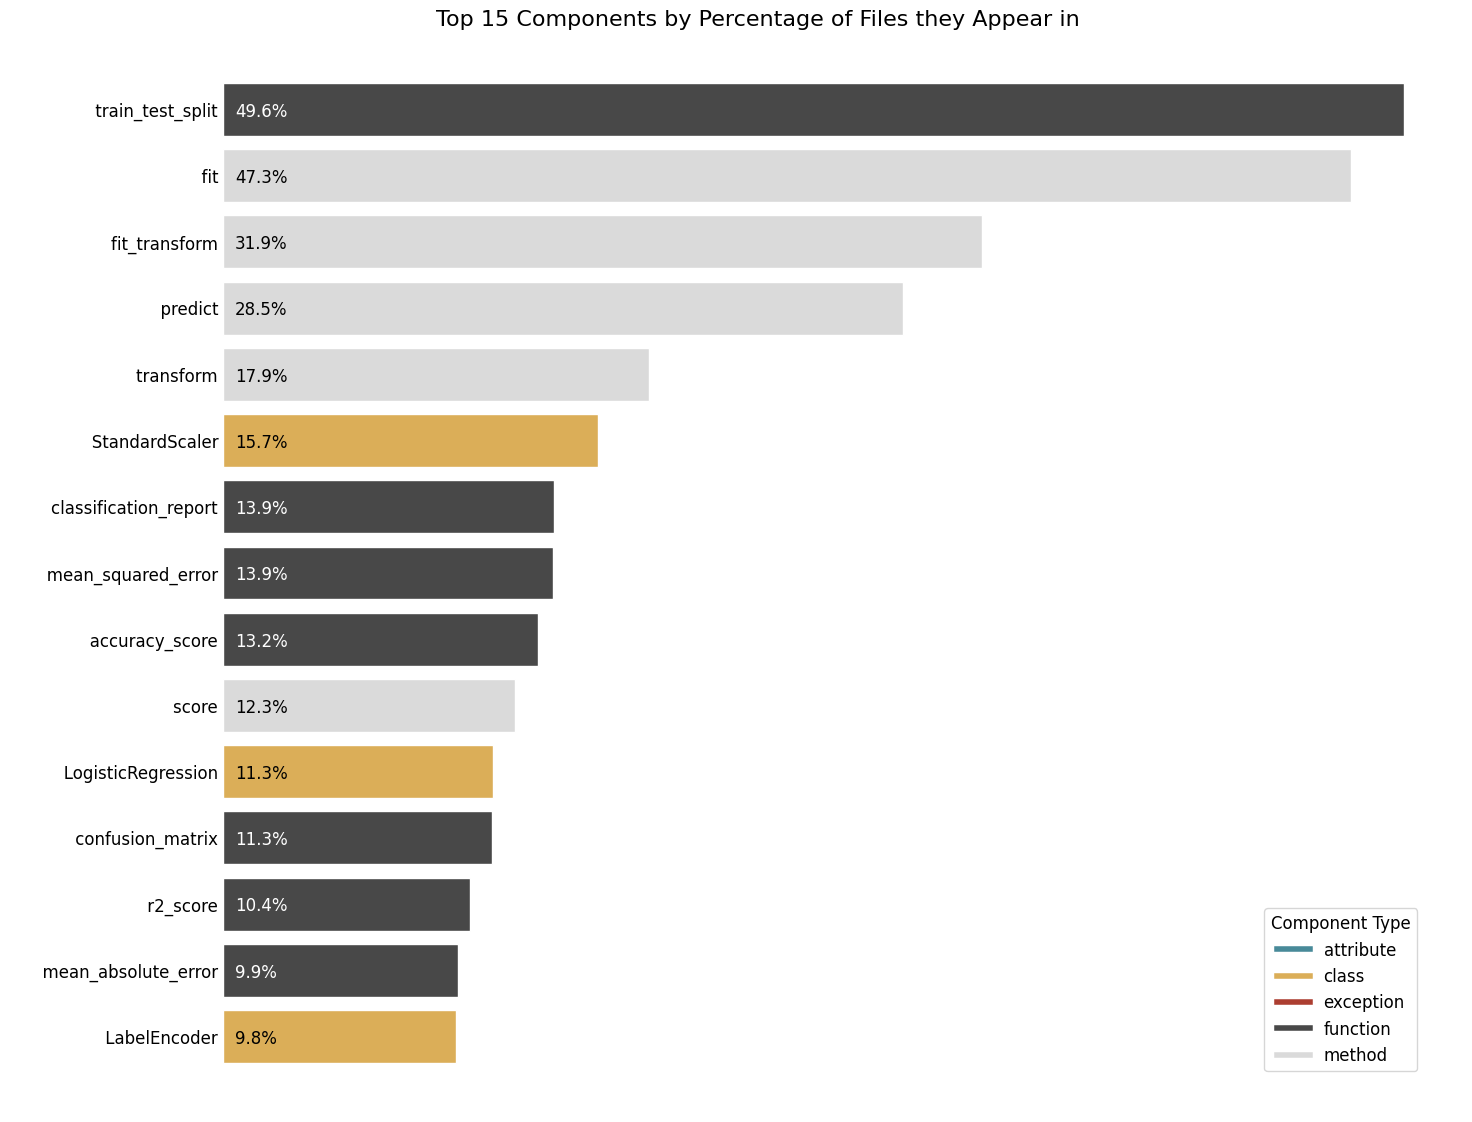

In [10]:
file_count = ipynb_df['filename'].nunique()
component_counts = count_component_occurrences(ipynb_df, within_column='filename')
plot_component_popularity(component_counts, 'Top 15 Components by Percentage of Files they Appear in', divide_by_to_show_prc=file_count, top_n=15)

### Raw Numbers

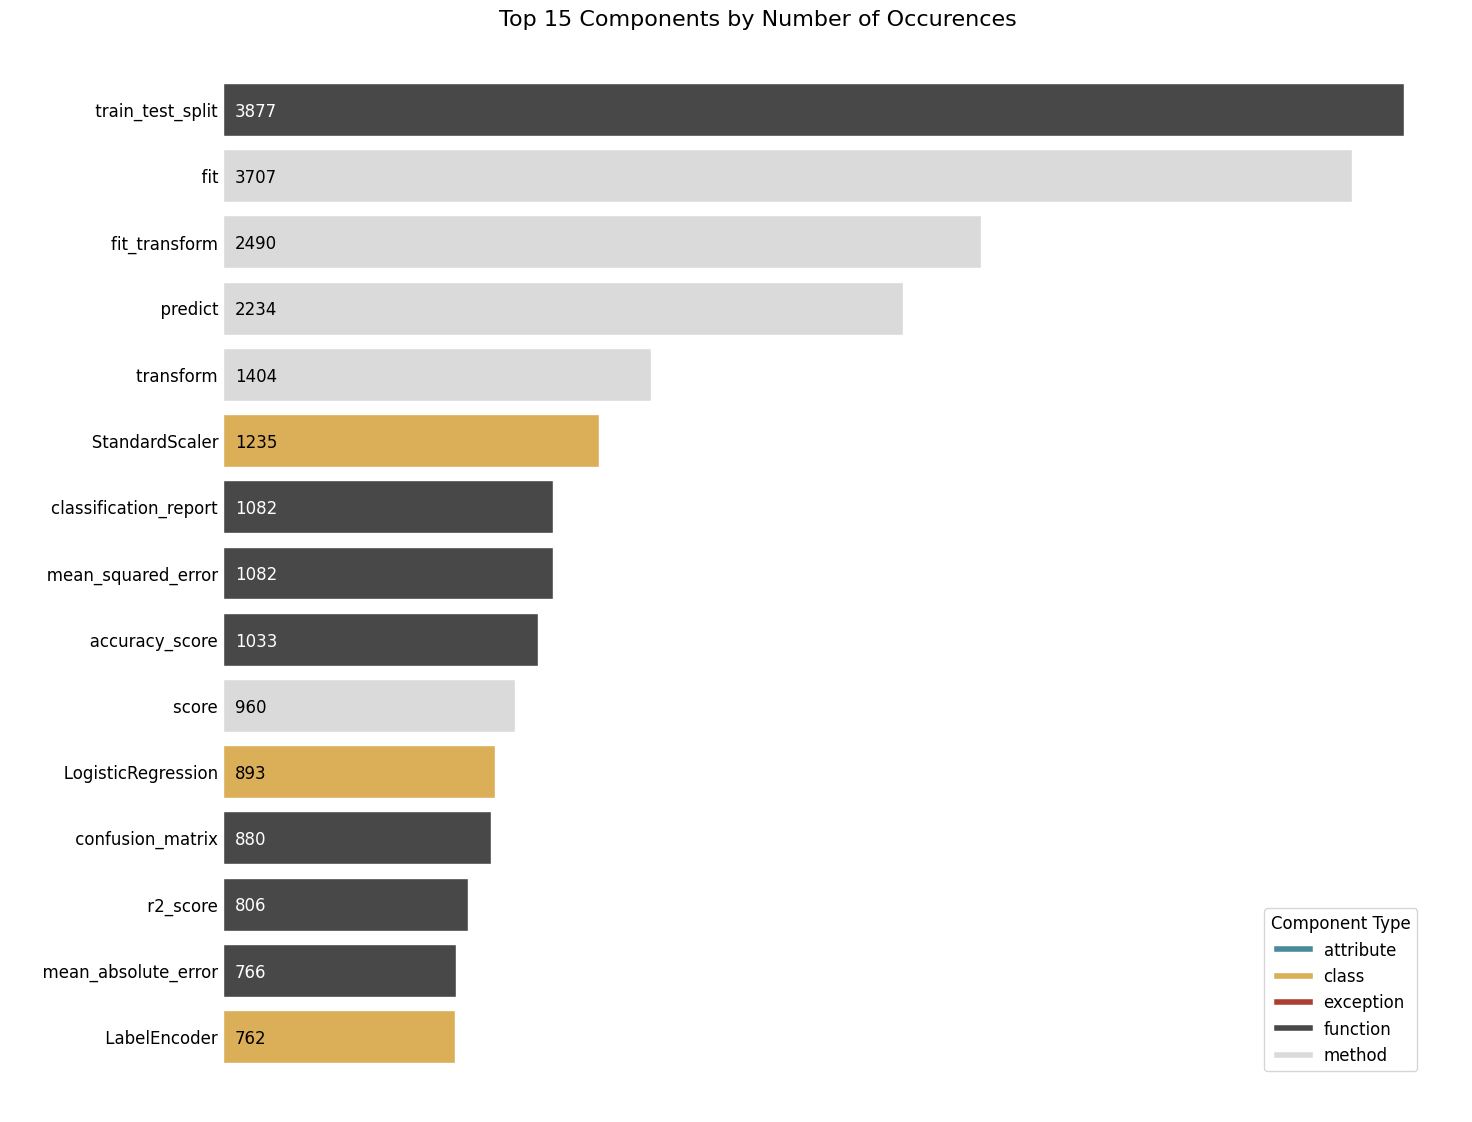

In [11]:
component_counts = count_component_occurrences(ipynb_df)
plot_component_popularity(component_counts, 'Top 15 Components by Number of Occurences', top_n=15)